In [1]:
import numpy as np

In [2]:
import seaborn as sns

# Generate Data

In [3]:
n = 100000
d = 4
# X = np.random.randn(n,d)

In [4]:
# diagonal elements are 1, off-diagonals are 0.2.
cov_matrix = 0.2 * np.ones((d, d)) + (1 - 0.2) * np.eye(d)
mean_vector = np.zeros(d)  

X = np.random.multivariate_normal(mean_vector, cov_matrix, size = n)

In [5]:
mu = X.mean(axis = 0)
cov = (1/n) * (X.T @ X)
cov_inv = np.linalg.inv(cov)

In [6]:
vals, vecs = np.linalg.eigh(cov)
cov_inv_sqrt_chol = np.linalg.cholesky(cov_inv)
cov_inv_sqrt = vecs @ np.diag(1.0 / np.sqrt(vals)) @ vecs.T

In [7]:
cov

array([[1.00178421, 0.19622465, 0.19787608, 0.19749126],
       [0.19622465, 0.99674144, 0.19879748, 0.19996641],
       [0.19787608, 0.19879748, 1.00513467, 0.19545305],
       [0.19749126, 0.19996641, 0.19545305, 1.00081907]])

In [8]:
cov_inv

array([[ 1.08899492, -0.15268363, -0.1541882 , -0.15427247],
       [-0.15268363,  1.09621697, -0.15594376, -0.15844343],
       [-0.1541882 , -0.15594376,  1.08532953, -0.15037347],
       [-0.15427247, -0.15844343, -0.15037347,  1.09064847]])

# Basic Whitening

In [9]:
W1 = cov_inv_sqrt_chol

In [10]:
W1 @ W1.T

array([[ 1.08899492, -0.15268363, -0.1541882 , -0.15427247],
       [-0.15268363,  1.09621697, -0.15594376, -0.15844343],
       [-0.1541882 , -0.15594376,  1.08532953, -0.15037347],
       [-0.15427247, -0.15844343, -0.15037347,  1.09064847]])

In [11]:
Y1 = X @ W1

In [12]:
cov_transform_1 = 1/n * (Y1.T @ Y1)

In [13]:
cov_transform_1

array([[ 1.00000000e+00, -3.43227669e-16,  1.48450141e-16,
        -2.49791299e-16],
       [-3.43227669e-16,  1.00000000e+00,  2.11786144e-16,
        -2.30589436e-16],
       [ 1.48450141e-16,  2.11786144e-16,  1.00000000e+00,
        -1.94058103e-16],
       [-2.49791299e-16, -2.30589436e-16, -1.94058103e-16,
         1.00000000e+00]])

<Axes: >

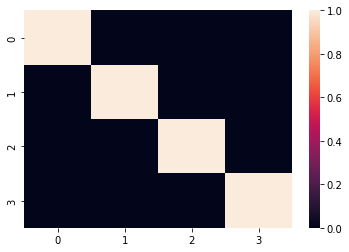

In [14]:
sns.heatmap(cov_transform_1)

# Generic Whitening

In [15]:
# Generate a random orthogonal basis Q
A = np.random.rand(d, d)
Q, R = np.linalg.qr(A)

In [16]:
Q.T @ Q

array([[ 1.00000000e+00,  5.75385483e-17, -5.94818704e-17,
        -1.28131680e-17],
       [ 5.75385483e-17,  1.00000000e+00,  9.86982418e-17,
         2.97996153e-16],
       [-5.94818704e-17,  9.86982418e-17,  1.00000000e+00,
         5.69896991e-17],
       [-1.28131680e-17,  2.97996153e-16,  5.69896991e-17,
         1.00000000e+00]])

In [17]:
W2 = cov_inv_sqrt @ Q
# W2 = np.linalg.cholesky(cov_inv) @ Q

In [18]:
Y2 = X @ W2
cov_transform_2 = 1/n * (Y2.T @ Y2)

In [19]:
cov_transform_2

array([[ 1.00000000e+00, -1.52411417e-17, -2.30915287e-16,
         1.02176045e-16],
       [-1.52411417e-17,  1.00000000e+00, -1.20419230e-16,
         7.03828107e-16],
       [-2.30915287e-16, -1.20419230e-16,  1.00000000e+00,
         2.37885267e-16],
       [ 1.02176045e-16,  7.03828107e-16,  2.37885267e-16,
         1.00000000e+00]])

<Axes: >

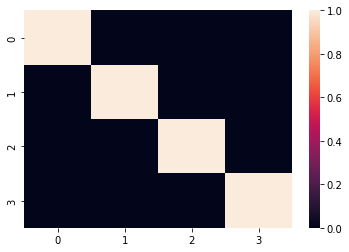

In [20]:
sns.heatmap(cov_transform_2)